# Data Discovery
The objective of this notebook is to explore the projections data provided in this [spreadsheet](https://docs.google.com/spreadsheets/d/1rlRXR_4QwKgkqjJ9-0UBOqGGcgdatSv8V1O_X-OKVrQ/edit?usp=sharing) and suggest the best way to visualize it on a dashboard.

## Setup

### Library import

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify

## Read data

In [167]:
# Load both sheets to examine their content
xls = "../data/raw/Projections Model template for Vizzuality _ Mock Data .xlsx"
df = pd.read_excel(xls, sheet_name="Model", skiprows=5).drop(columns=["Unnamed: 0"])
df = df[df["Tech #"] != "ERROR CHECK"]

# Split the data into the different output types
market_potential = df.iloc[:238].copy()
addressable_market = df.iloc[242:480].copy()
penetration = df.iloc[484:688].copy()
shipments = df.iloc[692:930].copy()
installed_base = df.iloc[934:1172].copy()
prices = df.iloc[1176:1210].copy()
revenues = df.iloc[1214:1452].copy()

# Recommendations for Visualization

1. **KPI Cards** – Display summary metrics.
2. **Line Chart** – Show trends over time.
3. **Area Chart** – Highlight cumulative growth.
4. **Choropleth Map** – Visualize market data across regions.
5. **Stacked Bar Chart** – Compare metrics across categories.
6. **Treemap** – Display proportional contributions.
7. **Scatter Plot** – Highlight relationships between outputs.

**1. Key Performance Indicator (KPI) Cards** 

In [48]:
market_potential[
    (market_potential["Application"] == "Total")
    & (market_potential["Technology type"] == "Total")
    & (market_potential["Country"] == "Total EU Europe")
][2020]

32    17616177.573112
Name: 2020, dtype: object

In [49]:
addressable_market[
    (addressable_market["Application"] == "Total")
    & (addressable_market["Technology type"] == "Total")
    & (addressable_market["Country"] == "Total EU Europe")
][2020]

275    12582983.980794
Name: 2020, dtype: object

In [50]:
shipments[
    (shipments["Application"] == "Total")
    & (shipments["Technology type"] == "Total")
    & (shipments["Country"] == "Total EU Europe")
][2020]

726    205041.536578
Name: 2020, dtype: object

In [51]:
installed_base[
    (installed_base["Application"] == "Total")
    & (installed_base["Technology type"] == "Total")
    & (installed_base["Country"] == "Total EU Europe")
][2020]

969    205041.536578
Name: 2020, dtype: object

In [52]:
revenues[
    (revenues["Application"] == "Total")
    & (revenues["Technology type"] == "Total")
    & (revenues["Country"] == "Total EU Europe")
][2020]

1250    636096.900808
Name: 2020, dtype: object

In [53]:
prices[
    (prices["Application"] == "Total")
    & (prices["Technology type"] == "Total")
    & (prices["Country"] == "Total EU Europe")
][2020]

1212    83.782156
Name: 2020, dtype: object

Display key metrics in a dashboard-friendly format.

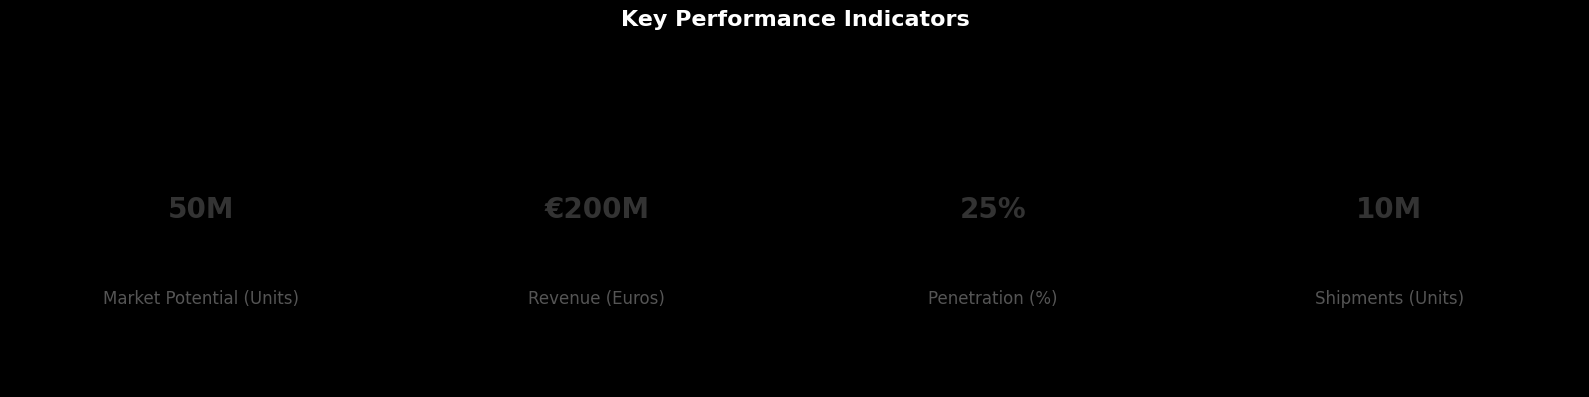

In [54]:
# Example KPI data
kpi_titles = ["Market Potential (Units)", "Revenue (Euros)", "Penetration (%)", "Shipments (Units)"]
kpi_values = ["50M", "€200M", "25%", "10M"]

# Create figure
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle("Key Performance Indicators", fontsize=16, fontweight="bold")

# Plot each KPI card
for i, ax_i in enumerate(ax):
    ax_i.set_facecolor("#f5f5f5")
    ax_i.set_xlim(0, 1)
    ax_i.set_ylim(0, 1)
    ax_i.text(
        0.5,
        0.6,
        kpi_values[i],
        fontsize=20,
        fontweight="bold",
        ha="center",
        va="center",
        color="#333333",
    )
    ax_i.text(0.5, 0.3, kpi_titles[i], fontsize=12, ha="center", va="center", color="#555555")
    ax_i.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

**2. Line Chart**

Show trends for key metrics over time.

In [55]:
df = market_potential[
    (market_potential["Application"] == "Total") & (market_potential["Technology type"] == "Total")
]

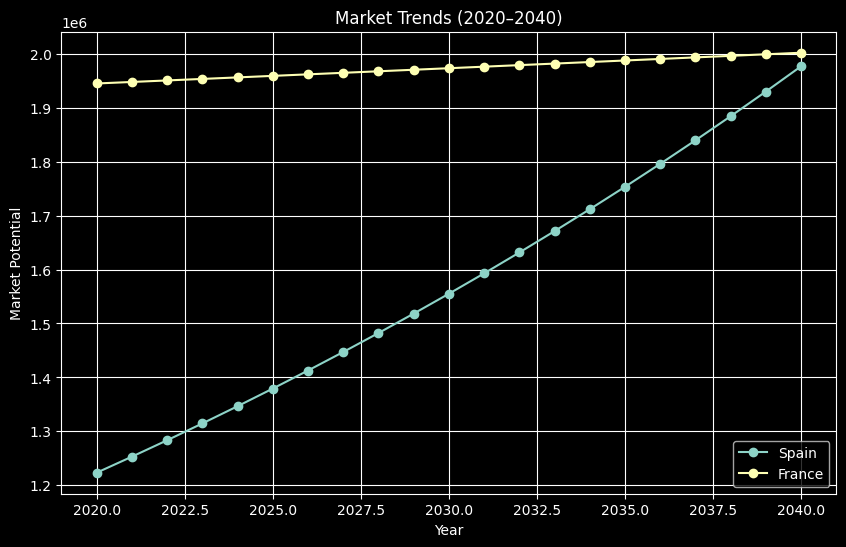

In [59]:
# Example line chart data
years = [int(i) for i in np.arange(2020, 2041)]
region_a = df[df["Country"] == "Spain"][years].iloc[0].to_list()
region_b = df[df["Country"] == "France"][years].iloc[0].to_list()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, region_a, label="Spain", marker="o")
ax.plot(years, region_b, label="France", marker="o")

ax.set_xlabel("Year")
ax.set_ylabel("Market Potential")
ax.set_title("Market Trends (2020–2040)")
ax.legend()
plt.grid(True)
plt.show()

**3. Area Chart**

Highlight cumulative growth over time.

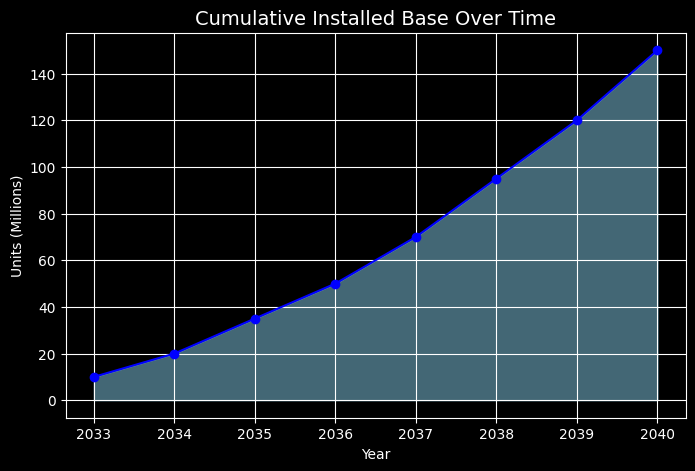

In [61]:
# Example cumulative growth data
years = [2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040]
installed_base = [10, 20, 35, 50, 70, 95, 120, 150]

# Plot the area chart
plt.figure(figsize=(8, 5))
plt.fill_between(years, installed_base, color="skyblue", alpha=0.5)
plt.plot(years, installed_base, marker="o", color="blue")
plt.title("Cumulative Installed Base Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Units (Millions)")
plt.grid(True)
plt.show()

**4. Choropleth Map**

Visualize regional data.

In [99]:
df = shipments[(shipments["Application"] == "Total") & (shipments["Technology type"] == "Total")][
    ["Country", 2020]
]
df = df.iloc[:-8]

world = gpd.read_file("../data/raw/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world = world[["SOVEREIGNT", "geometry"]]

df = pd.merge(df, world, left_on="Country", right_on="SOVEREIGNT", how="left").drop(
    columns="SOVEREIGNT"
)

df = df[df["Country"] != "Malta"]
df = df.rename(columns={2020: "value"})

gdf = gpd.GeoDataFrame(df)

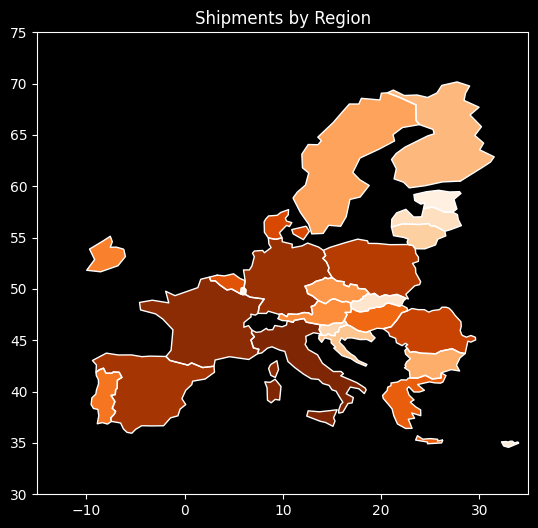

In [106]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.dropna(subset=["value"]).plot(column="value", ax=ax, cmap="Oranges")
ax.set_title("Shipments by Region")
ax.set_xlim([-15, 35])  # Set the x-axis range
ax.set_ylim([30, 75])  # Set the y-axis
plt.show()

**5. Stacked Bar Chart**

Compare multiple metrics across categories.

In [119]:
df = market_potential[
    (market_potential["Country"].isin(["Austria", "Belgium", "Bulgaria", "Croatia"]))
    & (market_potential["Application"] != "Total")
][["Application", "Country", 2020]]
df.head()

,Application,Country,2020
35,Crop cultivation- grains,Austria,355334.239339
36,Crop cultivation- grains,Belgium,71014.62272
37,Crop cultivation- grains,Bulgaria,54064.727371
38,Crop cultivation- grains,Croatia,103691.798371
69,Crop cultivation- vegetables,Austria,177667.11967


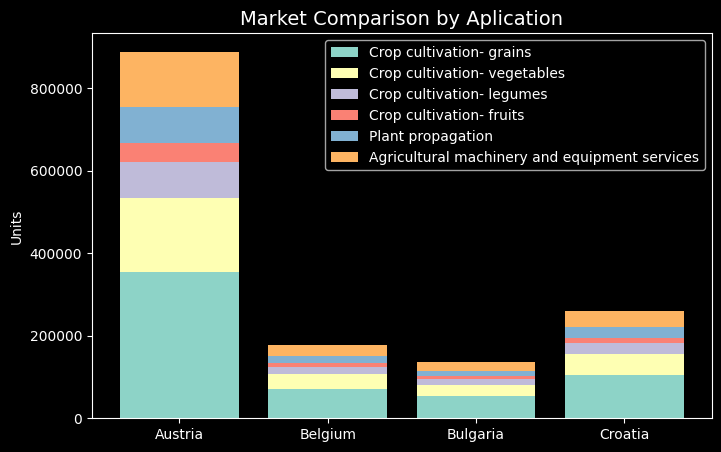

In [143]:
# Example stacked bar chart data
regions = list(df["Country"].unique())
categories = list(df["Application"].unique())
values = []
for cat in categories:
    values.append(df[df["Application"] == cat][2020].to_list())

x = np.arange(len(regions))

# Plot the stacked bar chart
plt.figure(figsize=(8, 5))
for i in range(len(values)):
    if i == 0:
        plt.bar(x, values[i], label=categories[i])
    else:
        plt.bar(x, values[i], bottom=np.sum(values[:i], axis=0), label=categories[i])
plt.xticks(x, regions)
plt.title("Market Comparison by Aplication", fontsize=14)
plt.ylabel("Units")
plt.legend()
plt.show()

**6. Treemap**

Display proportional contributions of technologies or subsegments.

In [161]:
df = market_potential[
    (market_potential["Country"].isin(["Spain"])) & (market_potential["Subsegment"] != "Total")
][["Subsegment", 2020]]
df = df.groupby("Subsegment").sum().reset_index()
df

,Subsegment,2020
0,Growing of non-perennial crops,856380.000928
1,Growing of perennial crops,61170.000066
2,Plant propagation,122340.000133
3,Support activities to agriculture and post-har...,183510.000199


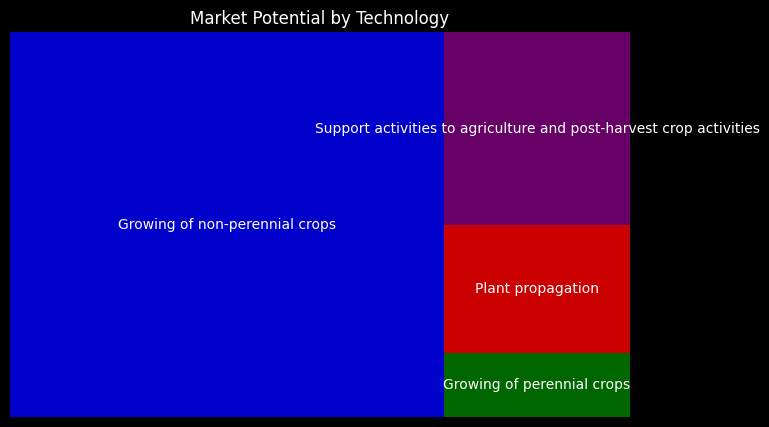

In [163]:
# Example treemap data
technologies = df["Subsegment"].to_list()
values = df[2020].to_list()

# Plot the treemap
plt.figure(figsize=(8, 5))
squarify.plot(sizes=values, label=technologies, color=["blue", "green", "red", "purple"], alpha=0.8)
plt.title("Market Potential by Technology")
plt.axis("off")
plt.show()

**7. Scatter Plot**

Analyze relationships between outputs.

In [181]:
penetration[
    (penetration["Application"] == "Crop cultivation- grains")
    & (penetration["Country"] == "Total EU Europe")
]  # [[2020]]

,Tech #,Technology,Subseg #,Subsegment,App #,Application,Technology type,Region,Units,Country,...,2033,2034,2035,2036,2037,2038,2039,2040,Unnamed: 32,Error Check
518,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Growing of non-perennial crops,1.1.1,Crop cultivation- grains,Hardware,EU Europe,%,Total EU Europe,...,0.545581,0.600285,0.653414,0.703584,0.748908,0.786803,0.826836,0.869133,NaN,NaN


In [177]:
penetration

,Tech #,Technology,Subseg #,Subsegment,App #,Application,Technology type,Region,Units,Country,...,2033,2034,2035,2036,2037,2038,2039,2040,Unnamed: 32,Error Check
486,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Growing of non-perennial crops,1.1.1,Crop cultivation- grains,Hardware,EU Europe,%,Austria,...,0.124479,0.135117,0.145123,0.154217,0.162032,0.16808,0.174354,0.180862,NaN,NaN
487,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Growing of non-perennial crops,1.1.1,Crop cultivation- grains,Hardware,EU Europe,%,Belgium,...,1.399679,1.543564,1.681475,1.809548,1.922588,2.013561,2.10884,2.208627,NaN,NaN
488,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Growing of non-perennial crops,1.1.1,Crop cultivation- grains,Hardware,EU Europe,%,Bulgaria,...,0.28188,0.293556,0.302851,0.309442,0.312912,0.312725,0.312539,0.312352,NaN,NaN
489,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Growing of non-perennial crops,1.1.1,Crop cultivation- grains,Hardware,EU Europe,%,Croatia,...,0.248877,0.274342,0.299815,0.324734,0.348325,0.369524,0.392014,0.415873,NaN,NaN
490,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Growing of non-perennial crops,1.1.1,Crop cultivation- grains,Hardware,EU Europe,%,Cyprus,...,0.320427,0.330636,0.338925,0.344949,0.348288,0.348419,0.348549,0.34868,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,Latin America,%,Latin America,...,0.959297,1.056953,1.150488,1.237287,1.313837,1.375389,1.439824,1.507279,NaN,NaN
686,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,Asia-Pacific,%,Asia-Pacific,...,0.581562,0.633744,0.68042,0.720063,0.750656,0.769507,0.788832,0.808642,NaN,NaN
687,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,Africa & Middle East,%,Africa & Middle East,...,0.459045,0.507,0.553379,0.596924,0.635938,0.668113,0.701916,0.73743,NaN,NaN
688,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,EU Europe,%,Total EU Europe,...,0.026537,0.029198,0.031782,0.034222,0.036427,0.03827,0.040217,0.042275,NaN,NaN


In [169]:
revenues

,Tech #,Technology,Subseg #,Subsegment,App #,Application,Technology type,Region,Units,Country,...,2033,2034,2035,2036,2037,2038,2039,2040,Unnamed: 32,Error Check
1218,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Total,1.1.1,Total,Total,EU Europe,Units,Austria,...,58172.372146,61080.990753,64135.04029,67341.792305,70708.88192,74244.326016,77956.542317,81854.369433,NaN,No Errors
1219,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Total,1.1.1,Total,Total,EU Europe,Units,Belgium,...,116352.992062,122170.641666,128279.173749,134693.132436,141427.789058,148499.178511,155924.137437,163720.344308,NaN,No Errors
1220,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Total,1.1.1,Total,Total,EU Europe,Units,Bulgaria,...,32194.370635,33804.089167,35494.293625,37269.008306,39132.458722,41089.081658,43143.535741,45300.712528,NaN,No Errors
1221,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Total,1.1.1,Total,Total,EU Europe,Units,Croatia,...,24921.081364,26167.135432,27475.492203,28849.266814,30291.730154,31806.316662,33396.632495,35066.46412,NaN,No Errors
1222,4,Guidance and Controlled Traffic Farming (CTF) ...,1.1,Total,1.1.1,Total,Total,EU Europe,Units,Cyprus,...,10759.516694,11297.492528,11862.367155,12455.485513,13078.259788,13732.172778,14418.781417,15139.720487,NaN,No Errors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,Latin America,(USD Thousand),Latin America,...,118169.762103,124078.250208,130282.162718,136796.270854,143636.084397,150817.888617,158358.783048,166276.7222,NaN,NaN
1453,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,Asia-Pacific,(USD Thousand),Asia-Pacific,...,514437.465726,540159.339012,567167.305963,595525.671261,625301.954824,656567.052565,689395.405193,723865.175453,NaN,NaN
1454,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,Africa & Middle East,(USD Thousand),Africa & Middle East,...,77914.180498,81809.889522,85900.383999,90195.403199,94705.173358,99440.432026,104412.453628,109633.076309,NaN,NaN
1455,4,Guidance and Controlled Traffic Farming (CTF) ...,1.6,Support activities to agriculture and post-har...,1.2.0,Agricultural machinery and equipment services,Hardware,EU Europe,(USD Thousand),Total EU Europe,...,490596.917362,515126.763231,540883.101392,567927.256462,596323.619285,626139.800249,657446.790262,690319.129775,NaN,NaN


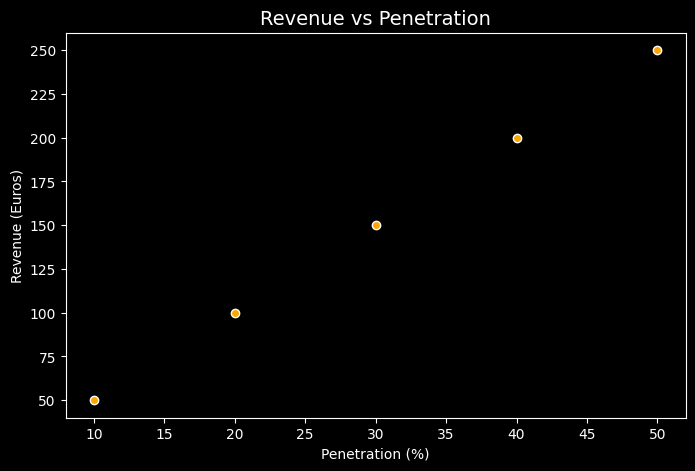

In [166]:
# Example scatter plot data
penetration = [10, 20, 30, 40, 50]
revenue = [50, 100, 150, 200, 250]

# Plot the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(penetration, revenue, color="orange", edgecolor="w")
plt.title("Revenue vs Penetration", fontsize=14)
plt.xlabel("Penetration (%)")
plt.ylabel("Revenue (Euros)")
# plt.grid(True)
plt.show()

**8. Bar Chart** 

Compare metrics across categories.

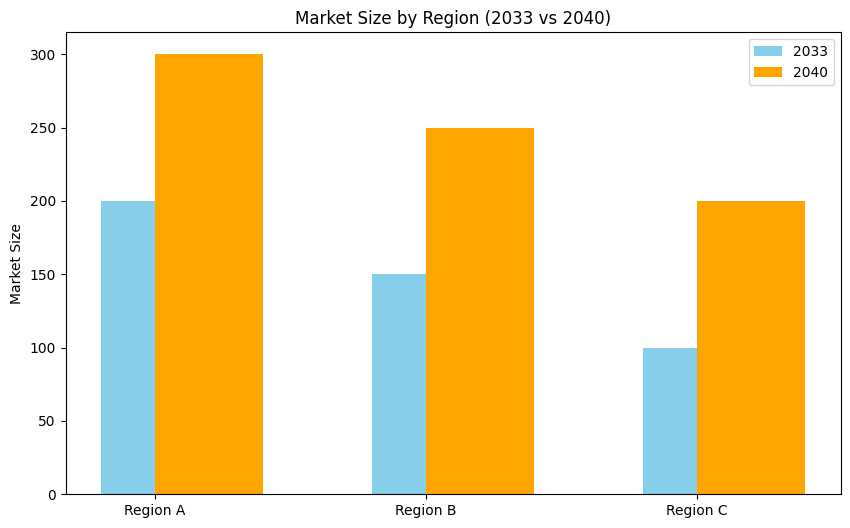

In [73]:
# Example bar chart data
regions = ["Region A", "Region B", "Region C"]
year_2033 = [200, 150, 100]
year_2040 = [300, 250, 200]

x = range(len(regions))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, year_2033, width=0.4, label="2033", color="skyblue", align="center")
ax.bar(x, year_2040, width=0.4, label="2040", color="orange", align="edge")

ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.set_ylabel("Market Size")
ax.set_title("Market Size by Region (2033 vs 2040)")
ax.legend()
plt.show()